In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("C:/Users/HP/Desktop/household_power_consumption.txt", sep=';', low_memory=False)


In [11]:
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
# Combining Date & Time to a single column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [13]:
df.drop(columns=['Date', 'Time'], inplace=True)
# 2 columns dropped

In [14]:
df.shape

(2075259, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [16]:
df.replace('?', np.nan, inplace=True)


In [17]:
# List of columns to convert
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Conversion to float
df[numeric_cols] = df[numeric_cols].astype(float)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [19]:
df.isnull().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [20]:
df.set_index('Datetime', inplace=True)
df.interpolate(method='time', inplace=True)

In [21]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00
std,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [22]:
df.reset_index(inplace=True) 


In [23]:
print(df.isnull().sum())


Datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [24]:
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday # 0 - Monday
df['is_weekend'] = df['weekday'] >= 5
df['year'] = df['Datetime'].dt.year

In [25]:
df.sample()


,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,is_weekend,year
1238420,2009-04-24 17:44:00,1.608,0.214,242.28,6.6,0.0,0.0,19.0,17,24,4,4,False,2009


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   hour                   int32         
 9   day                    int32         
 10  month                  int32         
 11  weekday                int32         
 12  is_weekend             bool          
 13  year                   int32         
dtypes: bool(1), datetime64[ns](1), float64(7), int32(5)
memory usage: 168.2 MB


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

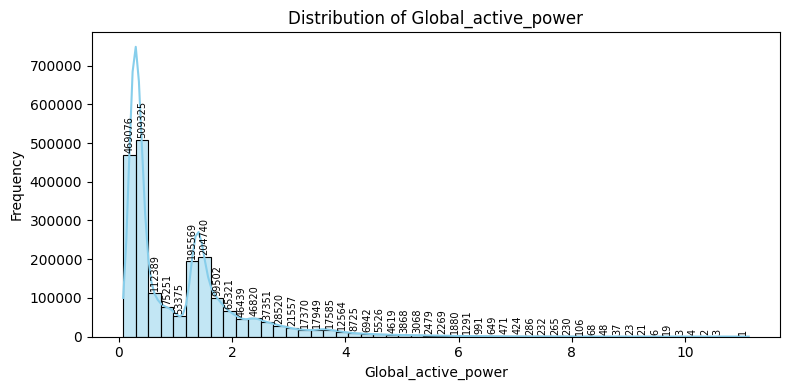

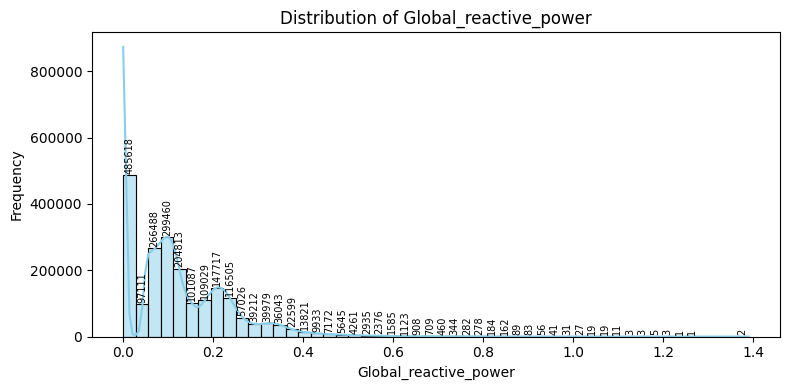

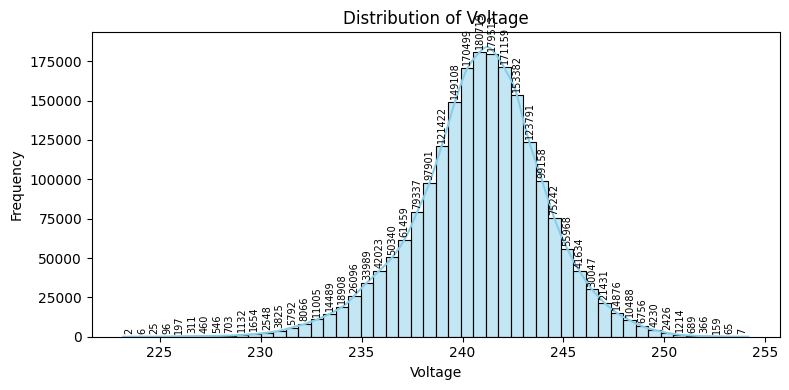

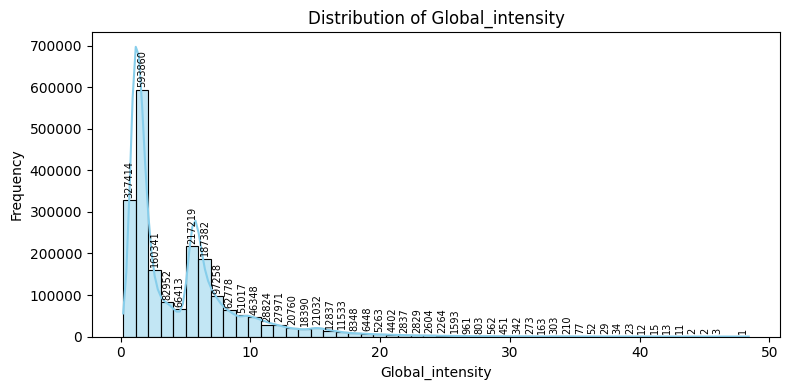

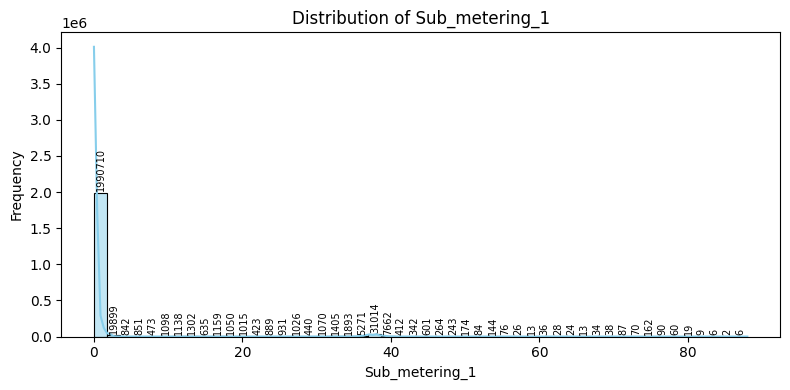

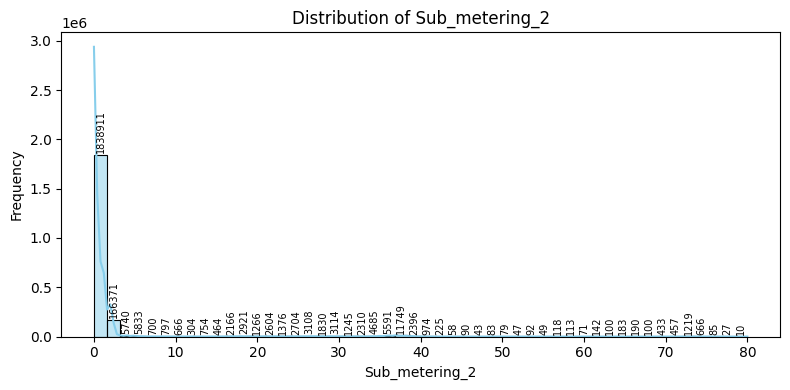

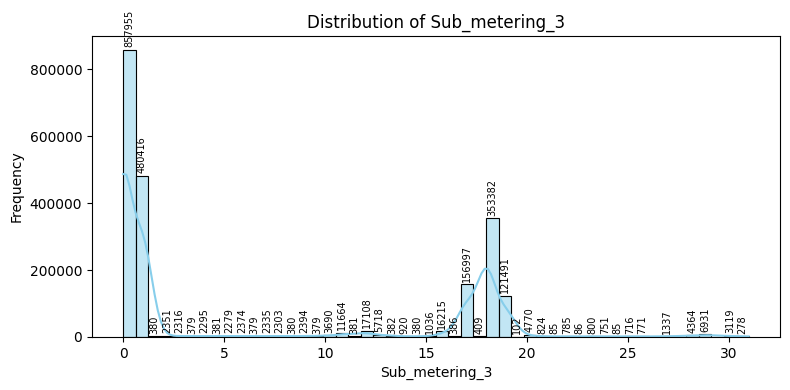

In [28]:
# Continuous variable's distribution

numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    
    
    counts, bin_edges = np.histogram(df[col].dropna(), bins=50)
    
    # Plotting histogram 
    ax = sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    
    for i in range(len(counts)):
        x = (bin_edges[i] + bin_edges[i+1]) / 2
        y = counts[i]
        if y > 0:  
            plt.text(x, y + max(counts) * 0.01, str(y), ha='center', va='bottom', fontsize=7, rotation=90)

    plt.tight_layout()
    plt.show()

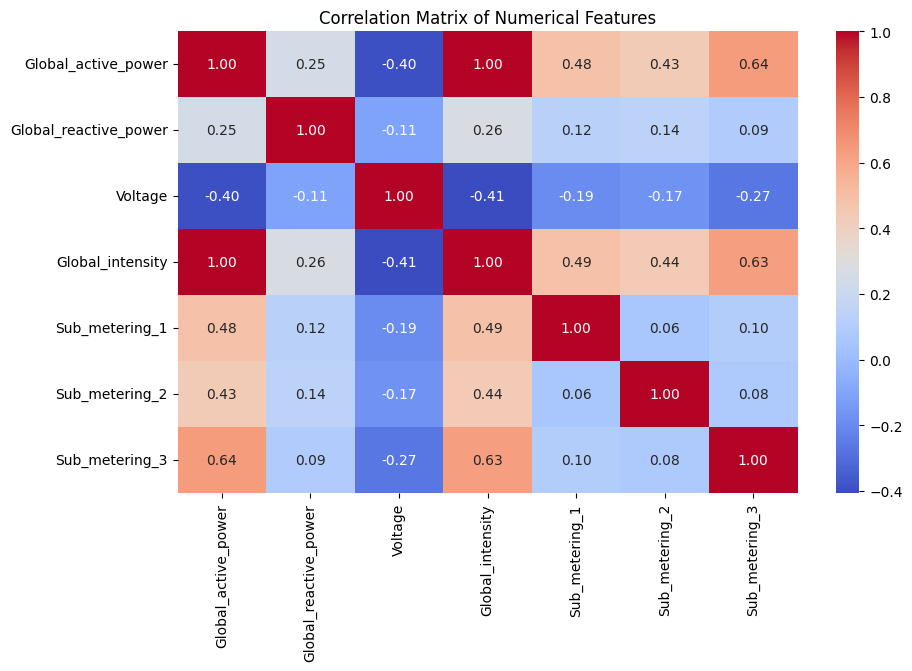

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Text(0.5, 1.0, 'Relationship Between Intensity and Power Usage')

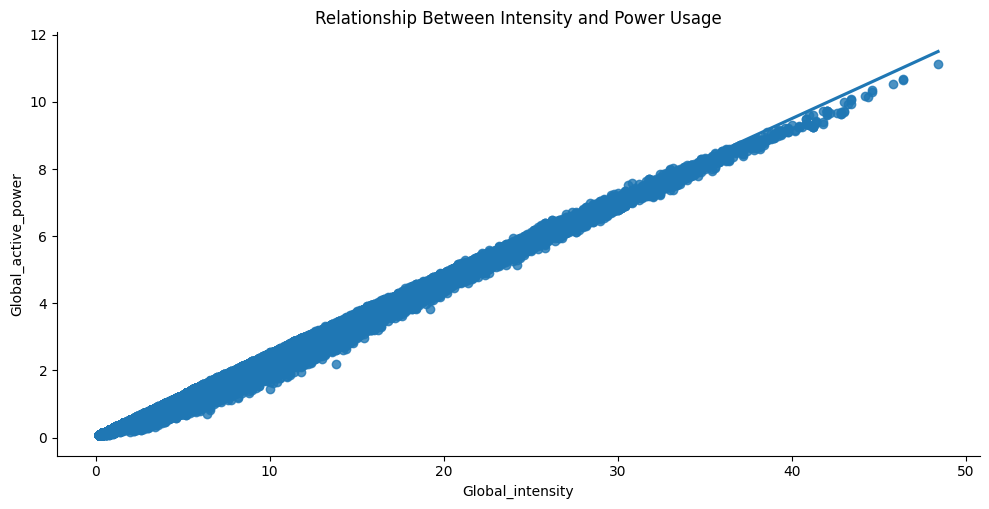

In [30]:
# Global_intensity vs Global_active_power
sns.lmplot(x='Global_intensity', y='Global_active_power', data=df, height=5, aspect=2)
plt.title('Relationship Between Intensity and Power Usage')

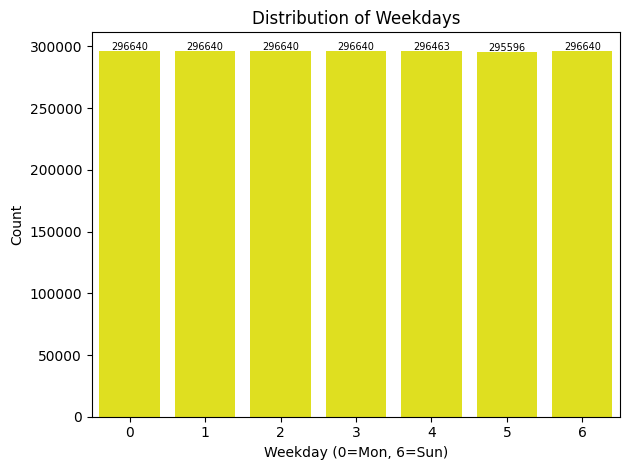

In [31]:
# Category Columns
# weekday
ax = sns.countplot(x='weekday', data=df , color='yellow')
plt.title('Distribution of Weekdays')
plt.xlabel('Weekday (0=Mon, 6=Sun)')
plt.ylabel('Count')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., count + 500, f'{count}', ha='center', fontsize=7)
    plt.tight_layout()
plt.show()

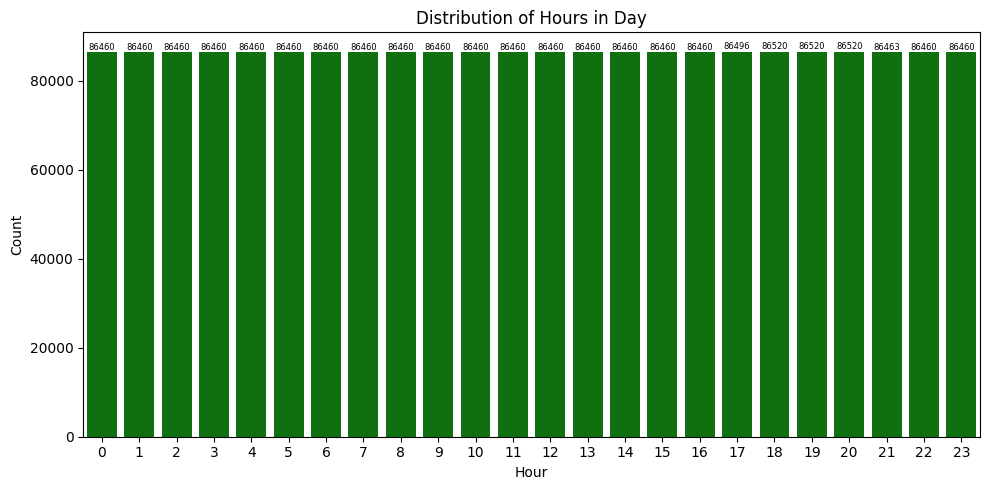

In [32]:
# For hours
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='hour', data=df, color='green')  
plt.title('Distribution of Hours in Day')
plt.xlabel('Hour')
plt.ylabel('Count')

for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., count + 500, f'{count}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

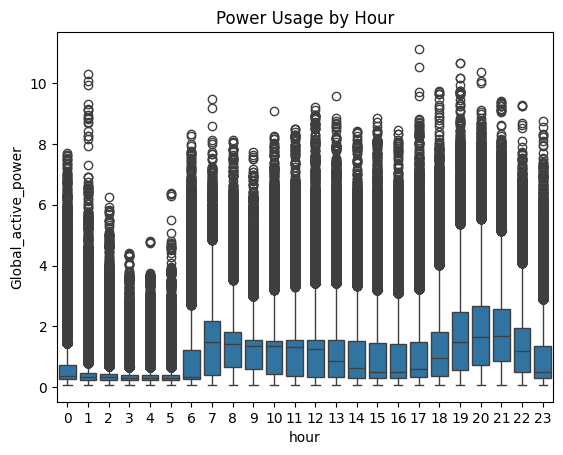

In [33]:
# Power usage by hour
sns.boxplot(x='hour', y='Global_active_power', data=df)
plt.title('Power Usage by Hour')
plt.show()

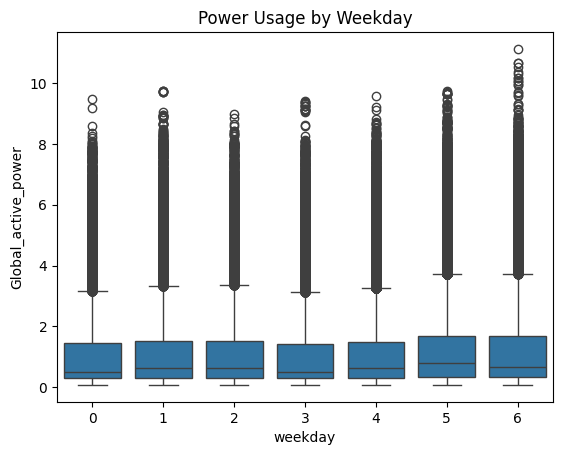

In [34]:
# Power usage by weekday
sns.boxplot(x='weekday', y='Global_active_power', data=df)
plt.title('Power Usage by Weekday')
plt.show()

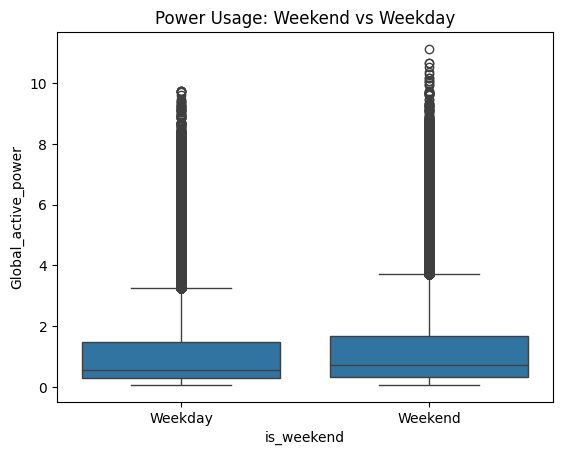

In [35]:
# Power usage: Weekend vs Weekday
sns.boxplot(x='is_weekend', y='Global_active_power', data=df)
plt.title('Power Usage: Weekend vs Weekday')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

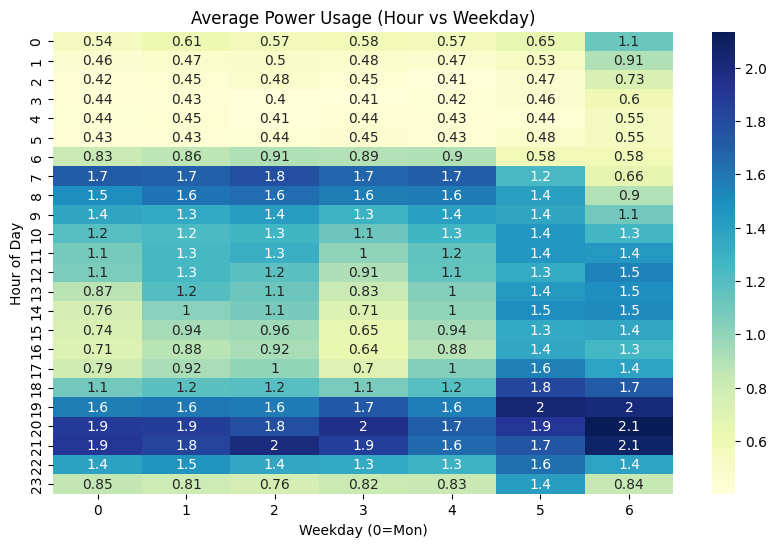

In [36]:
# Average power by weekday and hour
pivot = df.pivot_table(index='hour', columns='weekday', values='Global_active_power', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Average Power Usage (Hour vs Weekday)')
plt.xlabel('Weekday (0=Mon)')
plt.ylabel('Hour of Day')
plt.show()

<Axes: title={'center': 'Daily Average Power Consumption'}, xlabel='Datetime'>

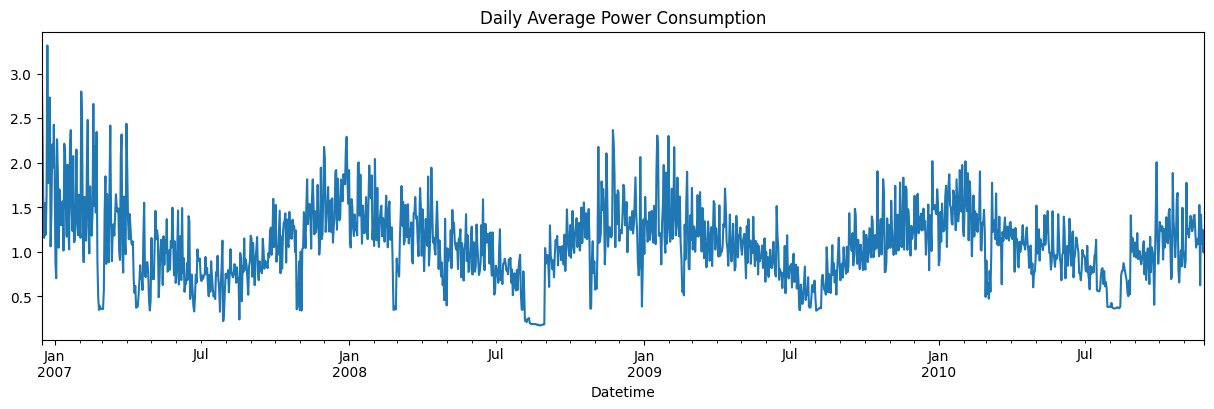

In [37]:
# Daily average power
daily_avg = df.resample('D', on='Datetime')['Global_active_power'].mean()
daily_avg.plot(figsize=(15, 4), title='Daily Average Power Consumption')

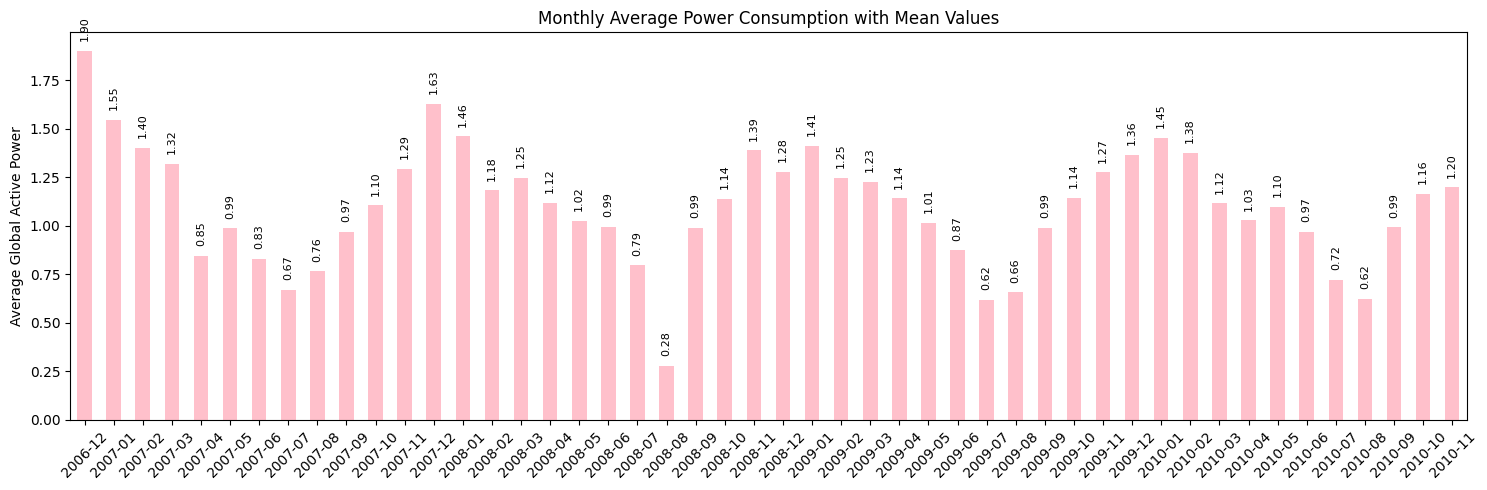

In [38]:
# Monthly Average Power Consumption with Mean Values
df['year_month_label'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

monthly_stats = df.groupby(['year', 'month']).agg(
    mean=('Global_active_power', 'mean'),
    count=('Global_active_power', 'count')
).reset_index()

monthly_stats['year_month_label'] = monthly_stats['year'].astype(str) + '-' + monthly_stats['month'].astype(str).str.zfill(2)

# Plot
ax = monthly_stats['mean'].plot(
    kind='bar',
    figsize=(15, 5),
    title='Monthly Average Power Consumption with Mean Values',
    color='pink'
)

plt.ylabel('Average Global Active Power')
plt.xticks(ticks=range(len(monthly_stats)), labels=monthly_stats['year_month_label'], rotation=45)

# actual average power values on the bars
for i, mean_val in enumerate(monthly_stats['mean']):
    ax.text(i, mean_val + 0.05, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20696\3222841564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='day', y='mean', data=daily_stats, palette='coolwarm')


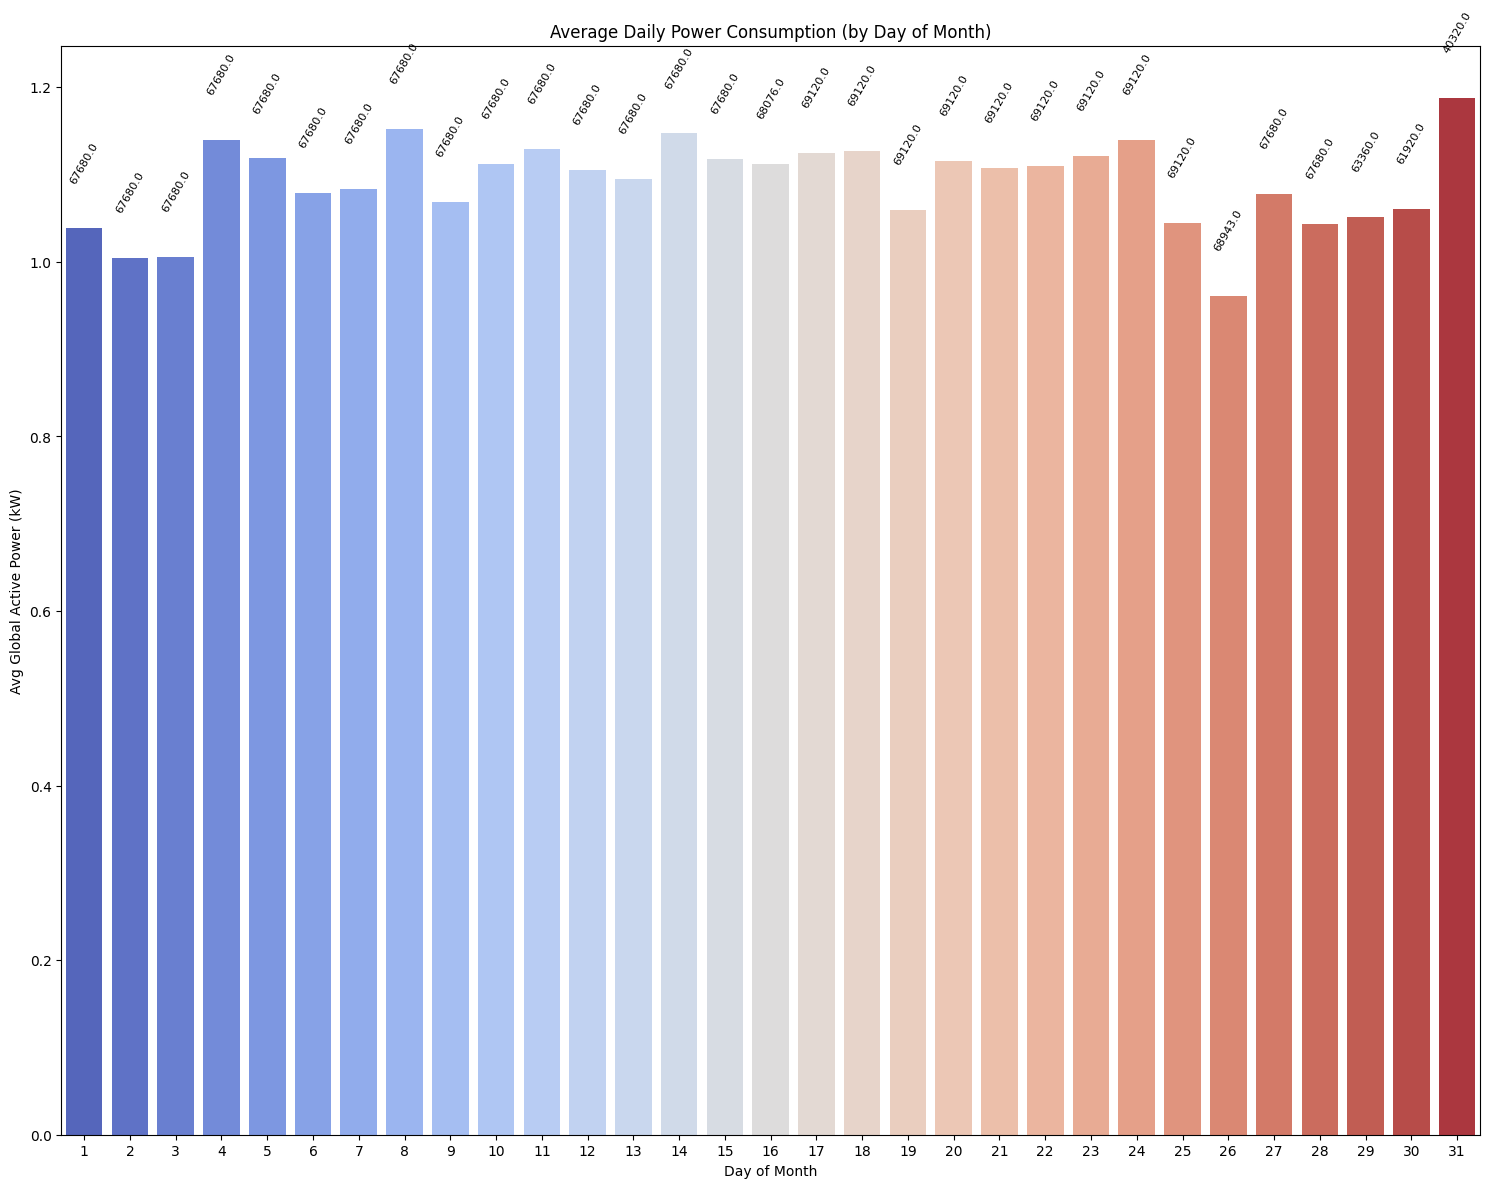

In [39]:
# daily average power consumption plot
daily_stats = df.groupby('day')['Global_active_power'].agg(['mean', 'count']).reset_index()

# Plotting
plt.figure(figsize=(15, 12))
ax = sns.barplot(x='day', y='mean', data=daily_stats, palette='coolwarm')

# counts on top of bars
for i, row in daily_stats.iterrows():
    ax.text(i, row['mean'] + 0.05, f"{row['count']}", ha='center', va='bottom', fontsize=8, rotation=60)

plt.title('Average Daily Power Consumption (by Day of Month)')
plt.xlabel('Day of Month')
plt.ylabel('Avg Global Active Power (kW)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
# Feature Engineering
# Daily Average Power Consumption
df['date'] = df['Datetime'].dt.date
daily_avg = df.groupby('date')['Global_active_power'].transform('mean')
df['daily_avg_power'] = daily_avg

In [41]:
# Rolling Average
df = df.sort_values('Datetime')
df['rolling_3h_power'] = df['Global_active_power'].rolling(window=180, min_periods=1).mean()

In [42]:
# 60-Minute Rolling Average
df['rolling_60min_power'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()

In [43]:
# 24-Hour Rolling Average
df['rolling_24h_power'] = df['Global_active_power'].rolling(window=1440, min_periods=1).mean()

In [44]:
# Peak Hour Indicator
df['peak_hour'] = df['hour'].between(17, 22).astype(int)

In [45]:
df.tail()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,...,weekday,is_weekend,year,year_month_label,date,daily_avg_power,rolling_3h_power,rolling_60min_power,rolling_24h_power,peak_hour
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,20,26,...,4,False,2010,2010-11,2010-11-26,1.17823,1.466156,1.173367,1.179669,1
2075255,2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,20,26,...,4,False,2010,2010-11,2010-11-26,1.17823,1.465500,1.163700,1.179271,1
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,21,26,...,4,False,2010,2010-11,2010-11-26,1.17823,1.464622,1.155067,1.178872,1
2075257,2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,21,26,...,4,False,2010,2010-11,2010-11-26,1.17823,1.463733,1.144733,1.178474,1
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,21,26,...,4,False,2010,2010-11,2010-11-26,1.17823,1.462878,1.133667,1.178078,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   hour                   int32         
 9   day                    int32         
 10  month                  int32         
 11  weekday                int32         
 12  is_weekend             bool          
 13  year                   int32         
 14  year_month_label       object        
 15  date                   object        
 16  daily_avg_power        float64       
 17  rolling_3h_power       float64       
 18  rolling_60min_power   

In [47]:
df['is_weekend'] = df['is_weekend'].astype(int)


In [48]:
# Dropping 'date' and 'Datetime' columns
df.drop(columns=['date', 'Datetime'], inplace=True, errors='ignore')

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   hour                   int32  
 8   day                    int32  
 9   month                  int32  
 10  weekday                int32  
 11  is_weekend             int64  
 12  year                   int32  
 13  year_month_label       object 
 14  daily_avg_power        float64
 15  rolling_3h_power       float64
 16  rolling_60min_power    float64
 17  rolling_24h_power      float64
 18  peak_hour              int64  
dtypes: float64(11), int32(5), int64(2), object(1)
memory usage: 261.2+ MB


In [50]:
df[df.duplicated()]


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,is_weekend,year,year_month_label,daily_avg_power,rolling_3h_power,rolling_60min_power,rolling_24h_power,peak_hour


In [51]:
df.to_csv('cleaned_energy_data.csv', index=False)


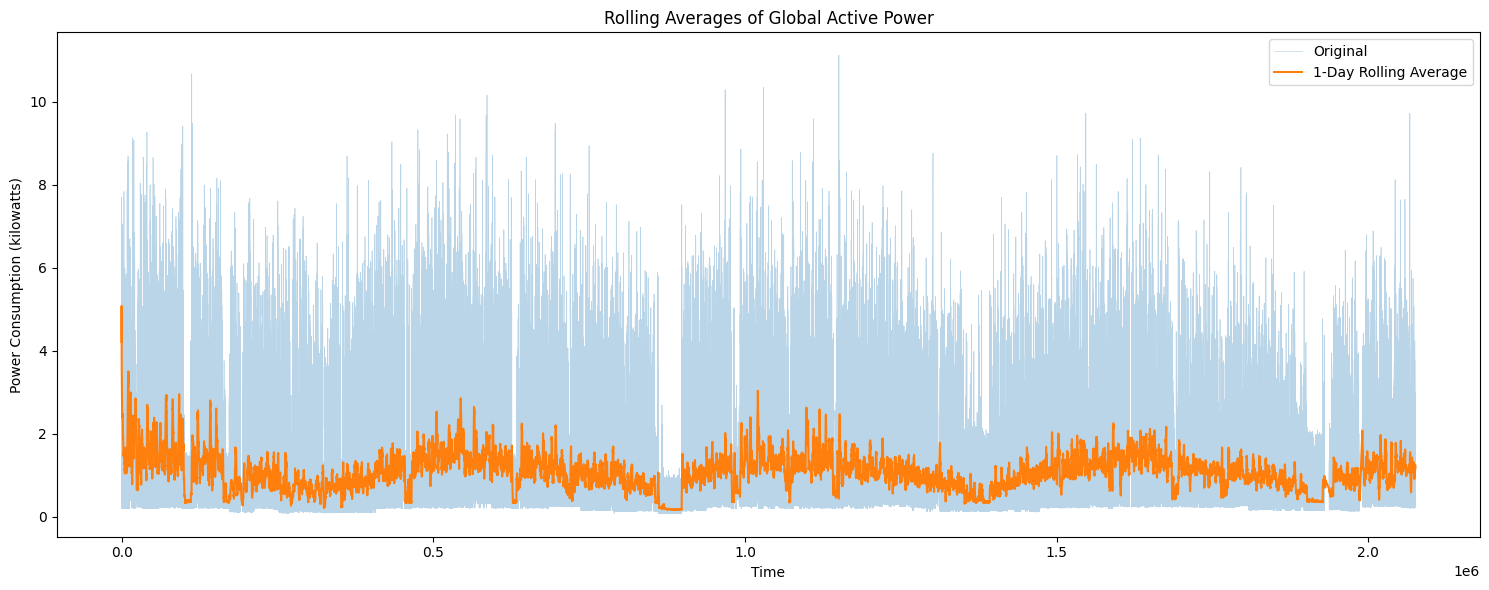

In [52]:
# Plot of Rolling Average
plt.figure(figsize=(15, 6))
df['Global_active_power'].plot(alpha=0.3, label='Original', linewidth=0.5)
df['rolling_24h_power'].plot(label='1-Day Rolling Average')
plt.title('Rolling Averages of Global Active Power')
plt.xlabel('Time')
plt.ylabel('Power Consumption (kilowatts)')
plt.legend()
plt.tight_layout()
plt.show()

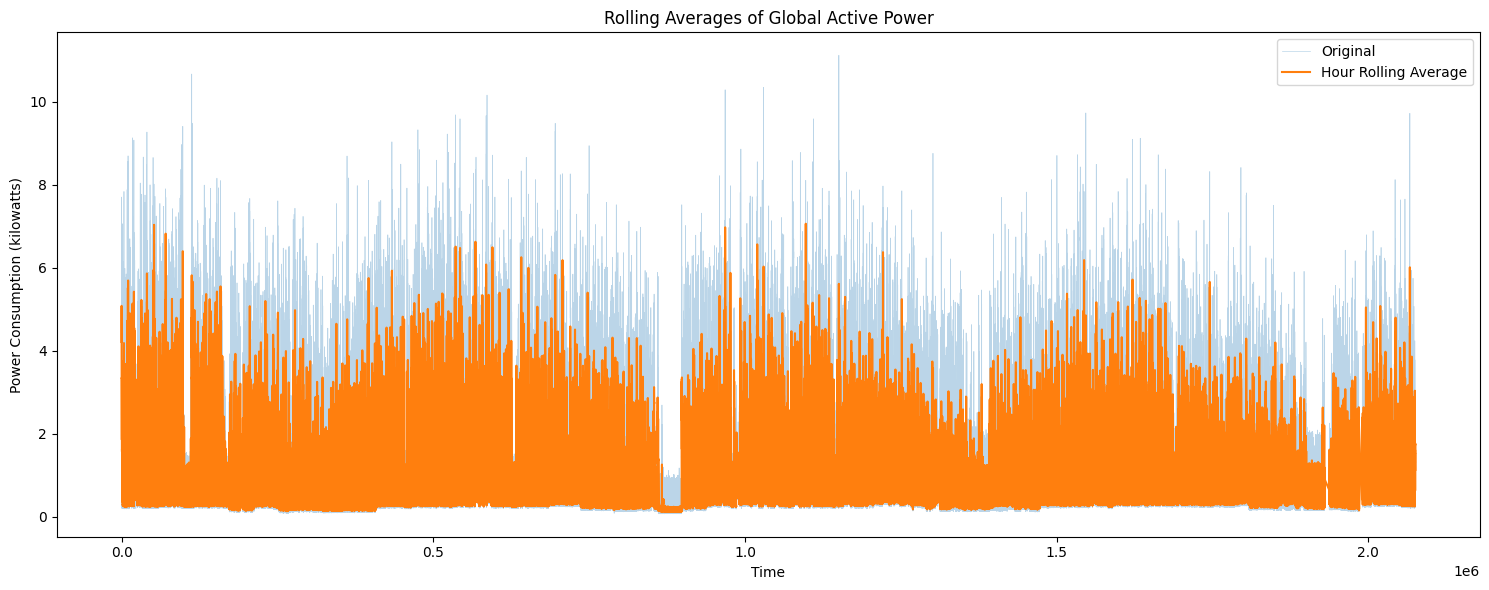

In [53]:
# Plot of Rolling Average
plt.figure(figsize=(15, 6))
df['Global_active_power'].plot(alpha=0.3, label='Original', linewidth=0.5)
df['rolling_60min_power'].plot(label='Hour Rolling Average')
plt.title('Rolling Averages of Global Active Power')
plt.xlabel('Time')
plt.ylabel('Power Consumption (kilowatts)')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
!pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------- -------------------------------- 2.1/10.7 MB 10.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.7 MB 10.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.7 MB 10.2 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.7 MB 9.7 MB/s eta 0:00:01
   -------------------------------------- - 10.2/10.7 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   -- ------------------------------------- 2.1/41.3 MB 10.7 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/41.3 MB 9.8 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/41.3 MB 9.4 MB/s eta 0:00:04
   ------- -------------------------------- 7.3/41.3 MB 9.1 MB/s eta 0:00:04
   --------- ------------------------------ 9.4/41.3 MB 9.0 MB/s eta 0:00:04
   ----

In [56]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'rolling_3h_power', 'rolling_24h_power'
]

df_scaled = df.copy()

scaler = MinMaxScaler()

# scaling applied
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

In [57]:
# Regression Model Training 

y = df['Global_active_power']
X = df.drop(columns=['Global_active_power'])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split off 10% of the data for faster experimentation
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Train-test split for model training
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [60]:
print(X_train.dtypes)
print(X_train.head())

Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
hour                       int32
day                        int32
month                      int32
weekday                    int32
is_weekend                 int64
year                       int32
year_month_label          object
daily_avg_power          float64
rolling_3h_power         float64
rolling_60min_power      float64
rolling_24h_power        float64
peak_hour                  int64
dtype: object
         Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
741187                   0.090   238.12              15.0            39.0   
1176879                  0.000   244.12               0.8             0.0   
1417967                  0.150   241.40               1.2             0.0   
797772                   0.448   236.71              16.4            38.0   
672773 

In [61]:
X_train = X_train.drop(columns=['year_month_label'])
X_test = X_test.drop(columns=['year_month_label'])

In [64]:
#Option 1: Safely Drop It (Simplest)
#If you don’t plan to use it in modeling, just make sure it's not included in X_train or X_test:
X_train = X_train.drop(columns=['year_month_label'], errors='ignore')
X_test = X_test.drop(columns=['year_month_label'], errors='ignore')

In [65]:
#Option 2: Use It (But Re-add It First If Needed)
#If you want to use the year_month_label column, first ensure it’s present in X_train and X_test.

#You can re-add it from your main DataFrame df:
# Assuming X_train and X_test are split from df
X_train['year_month_label'] = df.loc[X_train.index, 'year_month_label']
X_test['year_month_label'] = df.loc[X_test.index, 'year_month_label']

# Now convert and use it
X_train['year_month_label'] = pd.to_datetime(X_train['year_month_label'])
X_train['year_month_numeric'] = X_train['year_month_label'].dt.year * 100 + X_train['year_month_label'].dt.month
X_train = X_train.drop(columns=['year_month_label'])

X_test['year_month_label'] = pd.to_datetime(X_test['year_month_label'])
X_test['year_month_numeric'] = X_test['year_month_label'].dt.year * 100 + X_test['year_month_label'].dt.month
X_test = X_test.drop(columns=['year_month_label'])

In [66]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction for evaluation
rf_preds = rf_model.predict(X_test)

print("🔹 Random Forest")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_preds)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, rf_preds):.4f}")
print(f"R²  : {r2_score(y_test, rf_preds):.4f}")

🔹 Random Forest
RMSE: 0.0353
MAE : 0.0199
R²  : 0.9989


In [67]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=10, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction for evaluation
gb_preds = gb_model.predict(X_test)

print("🔹 Gradient Boosting")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, gb_preds)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, gb_preds):.4f}")
print(f"R²  : {r2_score(y_test, gb_preds):.4f}")

🔹 Gradient Boosting
RMSE: 0.0296
MAE : 0.0173
R²  : 0.9992


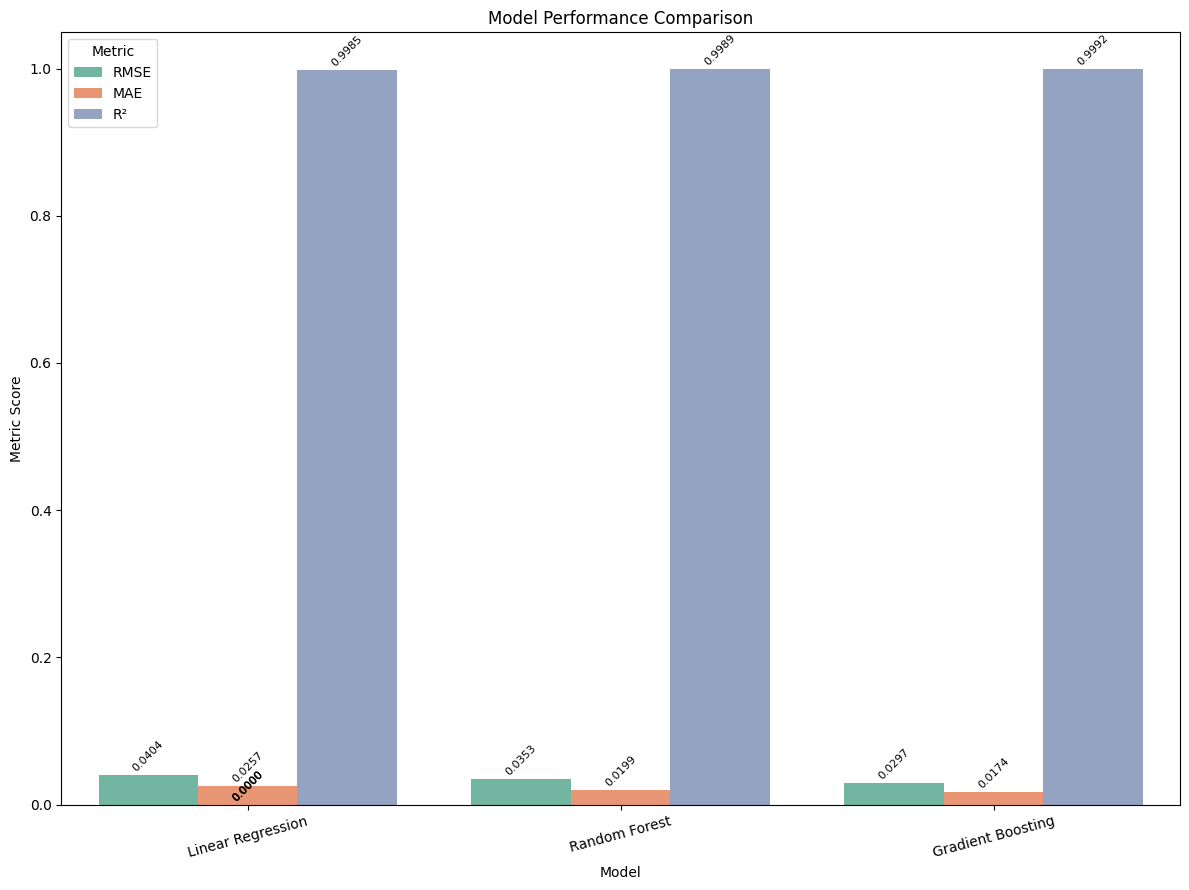

In [68]:
# comparing metrics across the three models

results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [0.0404, 0.0353, 0.0297],
    'MAE': [0.0257, 0.0199, 0.0174],
    'R²': [0.9985, 0.9989, 0.9992]
} 

results_df = pd.DataFrame(results)


results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 9))
ax = sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='Set2')

# bars with scores
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., height + 0.002, 
        f'{height:.4f}',
        ha='center', va='bottom', fontsize=8, rotation=45
    )

plt.title('Model Performance Comparison')
plt.ylabel('Metric Score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [69]:
# Performance/Fit of Gradient Boosting
train_preds = gb_model.predict(X_train)
test_preds = gb_model.predict(X_test)

# Train Metrics
print("📘 Training Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, train_preds)):.4f}")
print(f"MAE : {mean_absolute_error(y_train, train_preds):.4f}")
print(f"R²  : {r2_score(y_train, train_preds):.4f}")

# Test Metrics
print("\n📙 Testing Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_preds)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, test_preds):.4f}")
print(f"R²  : {r2_score(y_test, test_preds):.4f}")

📘 Training Performance:
RMSE: 0.0205
MAE : 0.0142
R²  : 0.9996

📙 Testing Performance:
RMSE: 0.0296
MAE : 0.0173
R²  : 0.9992


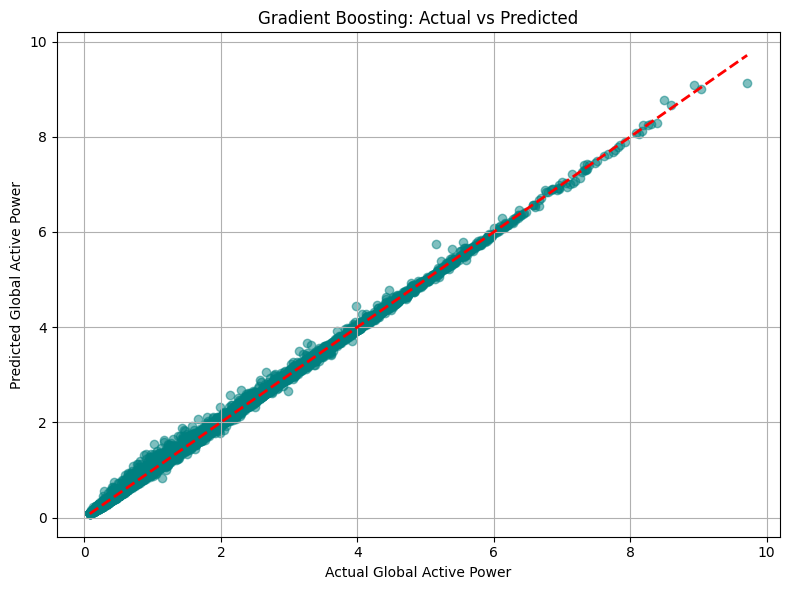

In [70]:
# Scatter plot of predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

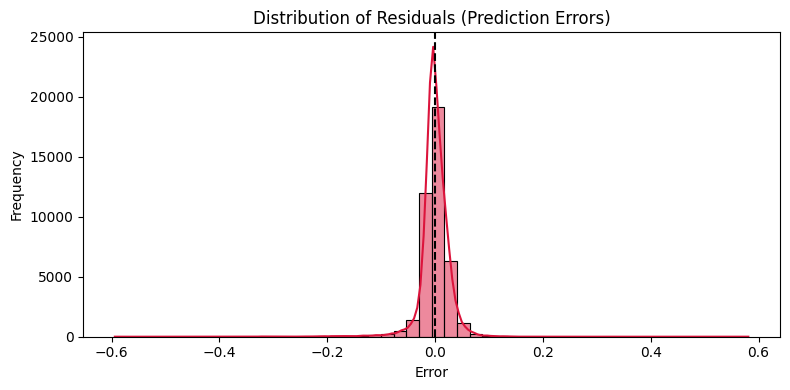

In [71]:
# Error Distribution Plot (Residuals)
from sklearn.metrics import mean_squared_error

# Assuming y_test and y_pred from your best model
residuals = y_test - test_preds

plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color='crimson')
plt.title('Distribution of Residuals (Prediction Errors)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20696\2976872569.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


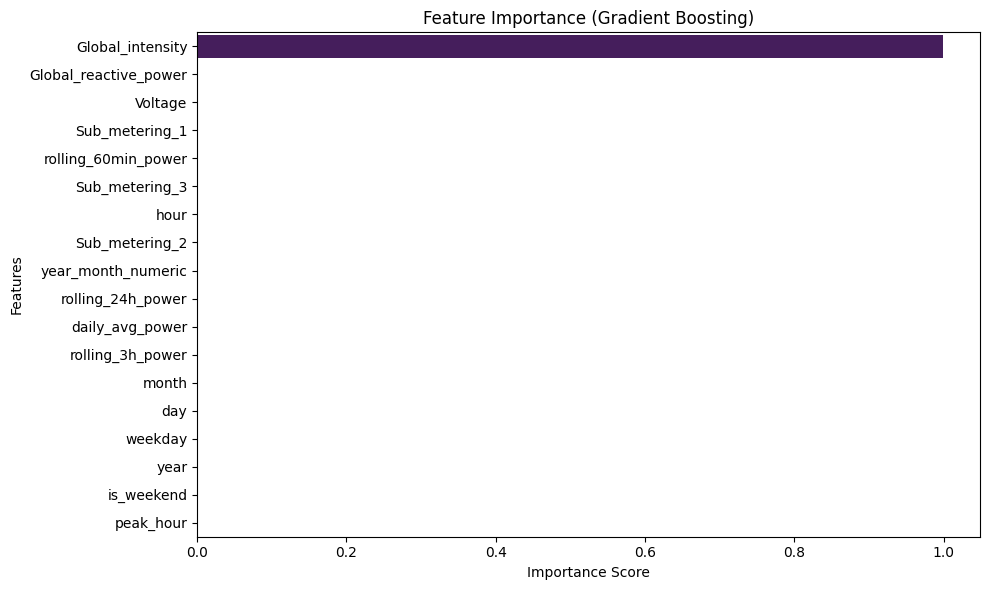

In [72]:
# feature importance DataFrame
feature_importance = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20696\2522016215.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


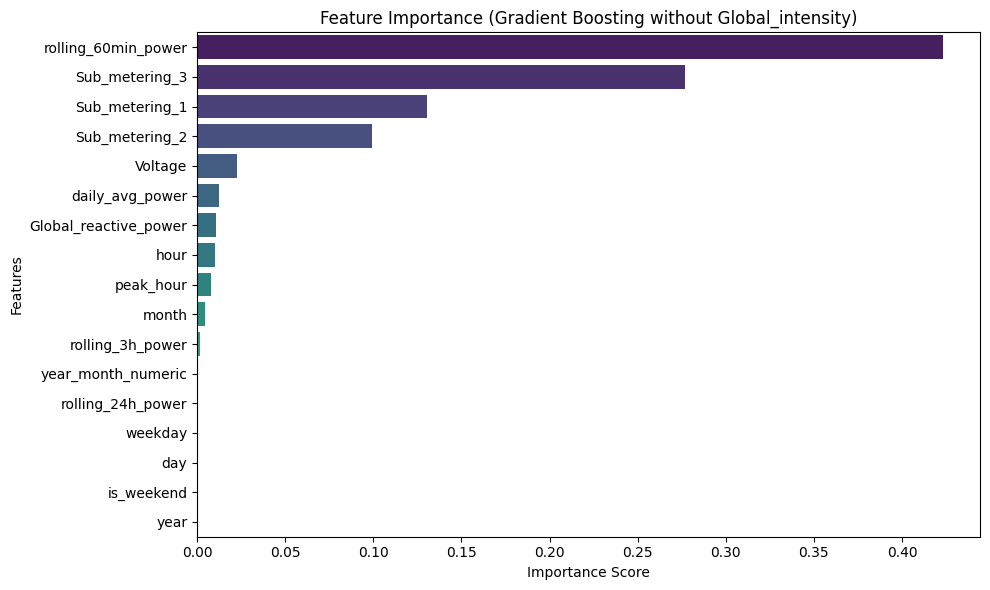

In [73]:
# Create a copy of X_train without 'Global_intensity'
X_train_no_intensity = X_train.drop(columns='Global_intensity')

# Retrain model without 'Global_intensity'
from sklearn.ensemble import GradientBoostingRegressor
gb_model_no_intensity = GradientBoostingRegressor(random_state=42)
gb_model_no_intensity.fit(X_train_no_intensity, y_train)

# Feature importance DataFrame
feature_importance = pd.Series(
    gb_model_no_intensity.feature_importances_, 
    index=X_train_no_intensity.columns
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance (Gradient Boosting without Global_intensity)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [74]:
# Drop 'Global_intensity' from X_test
X_test_no_intensity = X_test.drop(columns='Global_intensity')

# New predictions
train_preds = gb_model_no_intensity.predict(X_train_no_intensity)
test_preds = gb_model_no_intensity.predict(X_test_no_intensity)

# Train Metrics
print("📘 Training Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, train_preds)):.4f}")
print(f"MAE : {mean_absolute_error(y_train, train_preds):.4f}")
print(f"R²  : {r2_score(y_train, train_preds):.4f}")

# Test Metrics
print("\n📙 Testing Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_preds)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, test_preds):.4f}")
print(f"R²  : {r2_score(y_test, test_preds):.4f}")

📘 Training Performance:
RMSE: 0.3644
MAE : 0.2108
R²  : 0.8803

📙 Testing Performance:
RMSE: 0.3635
MAE : 0.2117
R²  : 0.8796


In [75]:
# Define features and target again
X = df_scaled.drop(columns=['Global_active_power'])  
y = df_scaled['Global_active_power']                 

# Re-split the data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [76]:
print(X_train.columns.tolist())


['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour', 'day', 'month', 'weekday', 'is_weekend', 'year', 'year_month_label', 'daily_avg_power', 'rolling_3h_power', 'rolling_60min_power', 'rolling_24h_power', 'peak_hour']


In [79]:
# 1. Inspect your training features
print(X_train.dtypes)
print(X_train.head())

Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
hour                       int32
day                        int32
month                      int32
weekday                    int32
is_weekend                 int64
year                       int32
year_month_label          object
daily_avg_power          float64
rolling_3h_power         float64
rolling_60min_power      float64
rolling_24h_power        float64
peak_hour                  int64
dtype: object
         Global_reactive_power   Voltage  Global_intensity  Sub_metering_1  \
1347712               0.000000  0.695961          0.012448             0.0   
378408                0.000000  0.562197          0.008299             0.0   
280143                0.070504  0.620355          0.016598             0.0   
670820                0.061871  0.669467          0.024896             0.0   
19

In [80]:
#2. Drop or encode non-numeric columns
#Assume your X_train has a column like 'month' with values '2009-01', convert it to numeric features:
#Option A: Drop non-numeric features (if not needed)
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [81]:
#Option B: Encode strings properly
#If you want to retain the 'month' column:
# Convert 'month' to datetime, then extract year and month separately
X_train['month'] = pd.to_datetime(X_train['month'], errors='coerce')
X_train['year'] = X_train['month'].dt.year
X_train['month_num'] = X_train['month'].dt.month
X_train = X_train.drop(columns=['month'])

# Do the same for X_test
X_test['month'] = pd.to_datetime(X_test['month'], errors='coerce')
X_test['year'] = X_test['month'].dt.year
X_test['month_num'] = X_test['month'].dt.month
X_test = X_test.drop(columns=['month'])

In [ ]:
#Now rerun your gridsearch
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

In [ ]:
# Hyperparameter Tuning (Using Grid Search)
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Grid search
grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)